In [21]:
import pandas as pd

In [22]:
#BHF = pd.read_csv("BHF_str.csv")
# Data Source: https://data.stadt-zuerich.ch/dataset/hystreet_fussgaengerfrequenzen
# Feiertage Schweiz
# Demonstrationen
# Density
# Pedestrian Dynamics?: https://github.com/PedestrianDynamics/PedPy/blob/main/notebooks/user_guide.ipynb

In [39]:
url_cs = "https://data.stadt-zuerich.ch/dataset/hystreet_fussgaengerfrequenzen/download/hystreet_fussgaengerfrequenzen_seit2021.csv"

BHF = pd.read_csv(
    url_cs,
    sep=',',
    encoding='utf-8',
)
BHF.head(2)

,timestamp,location_id,location_name,ltr_label,rtl_label,weather_condition,temperature,pedestrians_count,unverified,ltr_pedestrians_count,...,zone_3_pedestrians_count,zone_3_ltr_pedestrians_count,zone_3_rtl_pedestrians_count,zone_3_adult_pedestrians_count,zone_3_child_pedestrians_count,zone_99_pedestrians_count,zone_99_ltr_pedestrians_count,zone_99_rtl_pedestrians_count,zone_99_adult_pedestrians_count,zone_99_child_pedestrians_count
0,2021-09-28T22:00:00Z,329,Bahnhofstrasse (Mitte),Hauptbahnhof,Bürkliplatz,cloudy,13.51,151,False,93,...,47.0,30.0,17.0,47.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2021-09-28T22:00:00Z,331,Bahnhofstrasse (Nord),Bürkliplatz,Hauptbahnhof,cloudy,13.51,118,False,35,...,40.0,10.0,30.0,40.0,0.0,NaN,NaN,NaN,NaN,NaN


In [40]:
from urllib.request import urlopen 
import json 
url_js = "https://data.stadt-zuerich.ch/dataset/hystreet_fussgaengerfrequenzen/download/hystreet_locations.json"

In [41]:
response = urlopen(url_js) 
data_json = json.loads(response.read()) 
json_df = pd.json_normalize(data_json["features"])
json_df

,type,id,geometry.type,geometry.coordinates,properties.hystreet_location_id,properties.name,properties.city
0,Feature,331,Polygon,"[[[8.538222, 47.374015], [8.538598, 47.374015]...",331,Bahnhofstrasse (Nord),Zürich
1,Feature,329,Polygon,"[[[8.538947, 47.370233], [8.539215, 47.370273]...",329,Bahnhofstrasse (Mitte),Zürich
2,Feature,330,Polygon,"[[[8.539939, 47.367523], [8.540229, 47.367581]...",330,Bahnhofstrasse (Süd),Zürich


In [42]:
import geopandas as gpd

geojson_gdf = gpd.GeoDataFrame.from_features(data_json["features"])
merged_data = pd.merge(BHF, geojson_gdf, how = "inner", left_on = "location_id", right_on = "hystreet_location_id")
merged_data.head(2)

,timestamp,location_id,location_name,ltr_label,rtl_label,weather_condition,temperature,pedestrians_count,unverified,ltr_pedestrians_count,...,zone_3_child_pedestrians_count,zone_99_pedestrians_count,zone_99_ltr_pedestrians_count,zone_99_rtl_pedestrians_count,zone_99_adult_pedestrians_count,zone_99_child_pedestrians_count,geometry,hystreet_location_id,name,city
0,2021-09-28T22:00:00Z,329,Bahnhofstrasse (Mitte),Hauptbahnhof,Bürkliplatz,cloudy,13.51,151,False,93,...,0.0,NaN,NaN,NaN,NaN,NaN,"POLYGON ((8.53895 47.37023, 8.53922 47.37027, ...",329,Bahnhofstrasse (Mitte),Zürich
1,2021-09-28T23:00:00Z,329,Bahnhofstrasse (Mitte),Hauptbahnhof,Bürkliplatz,cloudy,13.46,19,False,8,...,0.0,NaN,NaN,NaN,NaN,NaN,"POLYGON ((8.53895 47.37023, 8.53922 47.37027, ...",329,Bahnhofstrasse (Mitte),Zürich


In [43]:
merged_data.head(2)

,timestamp,location_id,location_name,ltr_label,rtl_label,weather_condition,temperature,pedestrians_count,unverified,ltr_pedestrians_count,...,zone_3_child_pedestrians_count,zone_99_pedestrians_count,zone_99_ltr_pedestrians_count,zone_99_rtl_pedestrians_count,zone_99_adult_pedestrians_count,zone_99_child_pedestrians_count,geometry,hystreet_location_id,name,city
0,2021-09-28T22:00:00Z,329,Bahnhofstrasse (Mitte),Hauptbahnhof,Bürkliplatz,cloudy,13.51,151,False,93,...,0.0,NaN,NaN,NaN,NaN,NaN,"POLYGON ((8.53895 47.37023, 8.53922 47.37027, ...",329,Bahnhofstrasse (Mitte),Zürich
1,2021-09-28T23:00:00Z,329,Bahnhofstrasse (Mitte),Hauptbahnhof,Bürkliplatz,cloudy,13.46,19,False,8,...,0.0,NaN,NaN,NaN,NaN,NaN,"POLYGON ((8.53895 47.37023, 8.53922 47.37027, ...",329,Bahnhofstrasse (Mitte),Zürich


In [44]:
gdf = gpd.GeoDataFrame(merged_data, geometry = gpd.GeoSeries(merged_data["geometry"]))

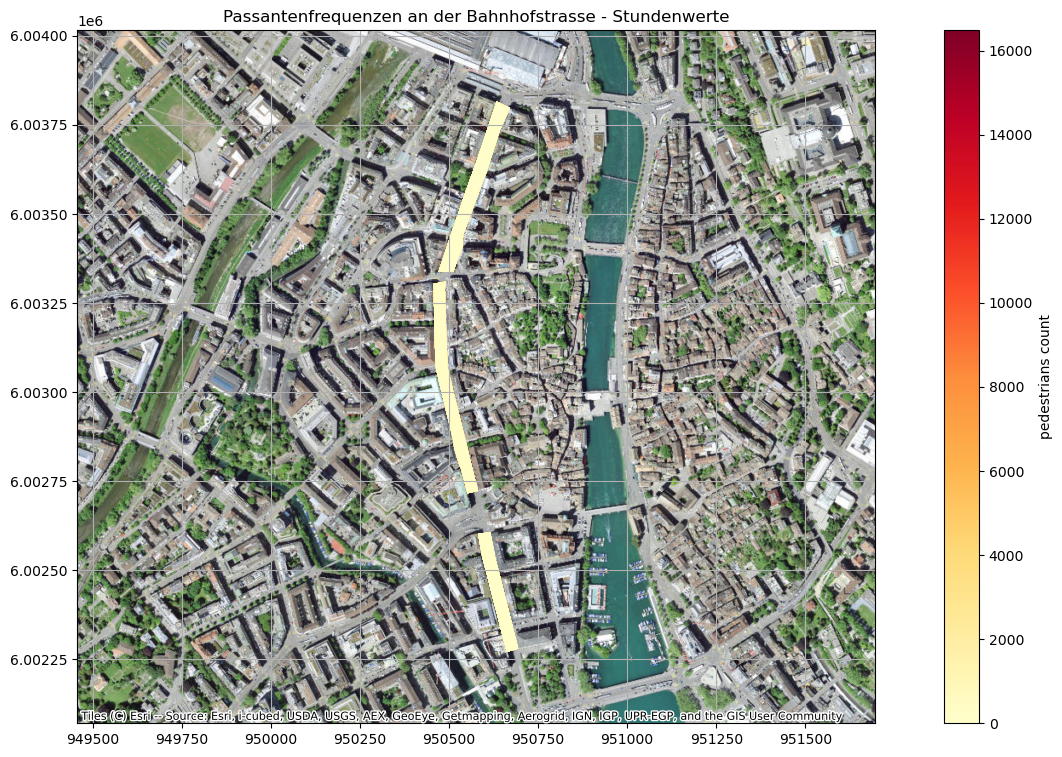

In [46]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Documentation: https://dlab.berkeley.edu/news/adding-basemaps-python-contextily
# 'EPSG:4326' is WGS84, the default CRS for GPS coordinates----------------------

gdf = gdf.set_crs("EPSG:4326") 

# Transform to Web Mercator (EPSG:3857)----------------------

gdf_3857 = gdf.to_crs("EPSG:3857")

# Create the plot----------------------

fig, ax = plt.subplots(figsize = (18, 9)) #--- faster ---
#fig, ax = plt.subplots(figsize = (30, 15)) --- for better rendering quality ---

gdf_3857.plot(ax=ax, column = "pedestrians_count", 
              cmap = "YlOrRd", 
              legend=True, 
              legend_kwds={'label': "pedestrians count"})
plt.title("Passantenfrequenzen an der Bahnhofstrasse - Stundenwerte")

# Padding for left and right sides----------------------

extra_space_lr = 1000 

# Padding for top and bottom----------------------

extra_space_tb = 200  

total_bounds = gdf_3857.total_bounds
x_min, y_min, x_max, y_max = total_bounds

# Adjust the limits to include more area around both GeoDataFrame and basemap----------------------

ax.set_xlim(x_min - extra_space_lr, x_max + extra_space_lr)
ax.set_ylim(y_min - extra_space_tb, y_max + extra_space_tb)

ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)  

plt.grid(visible=True)
plt.show()


In [48]:
# Consistency Analysis----------------------

# Count columns and rows----------------------

print(f"Count rows: {len(BHF)}")
print(f"Count columns: {len(BHF.columns)}")
print()

# BHF info----------------------

print(BHF.info())
print()

# Entries after 03.03.2022 are consistent (Dataset Description)----------------------

BHF["timestamp"] = pd.to_datetime(BHF["timestamp"])
entries_before_030322 = BHF[BHF["timestamp"] < "2022-03-03"]
entries_after_030322 = BHF[BHF["timestamp"] >= "2022-03-03"]

print(f"Count entries before 03.03.2022: {len(entries_before_030322)}")
print(f"Count entries after 03.03.2022: {len(entries_after_030322)}")

# Let's say the unverified column proofs consistency----------------------

consistent_data = BHF[BHF["timestamp"] >= "2022-03-03"]
reliable_data = consistent_data[consistent_data["unverified"] == False]

print(f"Count consistent data: {len(reliable_data)}")

Count rows: 55509
Count columns: 37

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55509 entries, 0 to 55508
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   timestamp                        55509 non-null  object 
 1   location_id                      55509 non-null  int64  
 2   location_name                    55509 non-null  object 
 3   ltr_label                        55509 non-null  object 
 4   rtl_label                        55509 non-null  object 
 5   weather_condition                55509 non-null  object 
 6   temperature                      55509 non-null  float64
 7   pedestrians_count                55509 non-null  int64  
 8   unverified                       55509 non-null  bool   
 9   ltr_pedestrians_count            55509 non-null  int64  
 10  rtl_pedestrians_count            55509 non-null  int64  
 11  adult_pedestrians_count          55509 non-